<a href="https://colab.research.google.com/github/archicos/8SlidingPuzzle/blob/main/comparison_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
file_path_before = '/content/drive/MyDrive/Levelearn/dataset_before_gamification.csv'
file_path_after = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

# Memuat dataset "before gamification" dan "after gamification"
df_after = pd.read_csv(file_path_after, encoding="latin-1", sep=";")
df_before = pd.read_csv(file_path_before, encoding="latin-1", sep=";")

In [16]:
# Daftar kolom HEART yang ingin kita uji
heart_columns = [
    "Happiness_Q1", "Happiness_Q2", "Happiness_Q3", "Happiness_Q4", "Happiness_Q5",
    "Engagement_Q1", "Engagement_Q2", "Engagement_Q3", "Engagement_Q4", "Engagement_Q5",
    "Adoption_Q1", "Adoption_Q2", "Adoption_Q3", "Adoption_Q4", "Adoption_Q5",
    "Retention_Q1", "Retention_Q2", "Retention_Q3", "Retention_Q4", "Retention_Q5",
    "TaskSuccess_Q1", "TaskSuccess_Q2", "TaskSuccess_Q3", "TaskSuccess_Q4", "TaskSuccess_Q5"
]

In [18]:
# Fungsi untuk melakukan Uji Shapiro-Wilk dan Uji Perbandingan (Paired t-test atau Wilcoxon)
def perform_tests(df_before, df_after, heart_columns):
    results = {}

    for aspect in heart_columns:
        before_data = df_before[aspect]
        after_data = df_after[aspect]

        # Uji Shapiro-Wilk untuk memeriksa distribusi data
        stat_before, p_before = stats.shapiro(before_data)
        stat_after, p_after = stats.shapiro(after_data)

        # Tentukan metode uji berdasarkan hasil uji Shapiro-Wilk
        if p_before > 0.05 and p_after > 0.05:
            # Data terdistribusi normal, gunakan Paired t-test
            t_stat, p_value = stats.ttest_rel(before_data, after_data)
            test_result = "Paired t-test"
        else:
            # Data tidak terdistribusi normal, gunakan Wilcoxon Signed-Rank Test
            stat, p_value = stats.wilcoxon(before_data, after_data)
            test_result = "Wilcoxon Signed-Rank Test"

        # Menyimpan hasil uji
        results[aspect] = {
            'Test': test_result,
            'Shapiro_Wilk_Before_p_value': p_before,
            'Shapiro_Wilk_After_p_value': p_after,
            'p_value': p_value
        }

    return results

In [20]:
# Melakukan uji pada semua kolom HEART
test_results = perform_tests(df_before, df_after, heart_columns)

# Menampilkan hasil uji
test_results

{'Happiness_Q1': {'Test': 'Wilcoxon Signed-Rank Test',
  'Shapiro_Wilk_Before_p_value': np.float64(3.185121404365605e-08),
  'Shapiro_Wilk_After_p_value': np.float64(3.185121404365605e-08),
  'p_value': np.float64(2.004896080280303e-13)},
 'Happiness_Q2': {'Test': 'Wilcoxon Signed-Rank Test',
  'Shapiro_Wilk_Before_p_value': np.float64(1.1015472685019946e-07),
  'Shapiro_Wilk_After_p_value': np.float64(3.236152116012976e-08),
  'p_value': np.float64(3.335483664057865e-13)},
 'Happiness_Q3': {'Test': 'Wilcoxon Signed-Rank Test',
  'Shapiro_Wilk_Before_p_value': np.float64(5.372790854793915e-07),
  'Shapiro_Wilk_After_p_value': np.float64(1.0670137820948464e-06),
  'p_value': np.float64(9.236596617174027e-13)},
 'Happiness_Q4': {'Test': 'Wilcoxon Signed-Rank Test',
  'Shapiro_Wilk_Before_p_value': np.float64(1.5827822595959617e-08),
  'Shapiro_Wilk_After_p_value': np.float64(1.6787132088224605e-09),
  'p_value': np.float64(3.335483664057865e-13)},
 'Happiness_Q5': {'Test': 'Wilcoxon Sign

<ipython-input-21-da825ac25d67>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([data_before, data_after], labels=["Before Gamification", "After Gamification"])
<ipython-input-21-da825ac25d67>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([data_before, data_after], labels=["Before Gamification", "After Gamification"])
<ipython-input-21-da825ac25d67>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[i].boxplot([data_before, data_after], labels=["Before Gamification", "After Gamification"])
<ipython-input-21-da825ac25d67>:8: MatplotlibDeprecationWarning: The 'labels' parameter of box

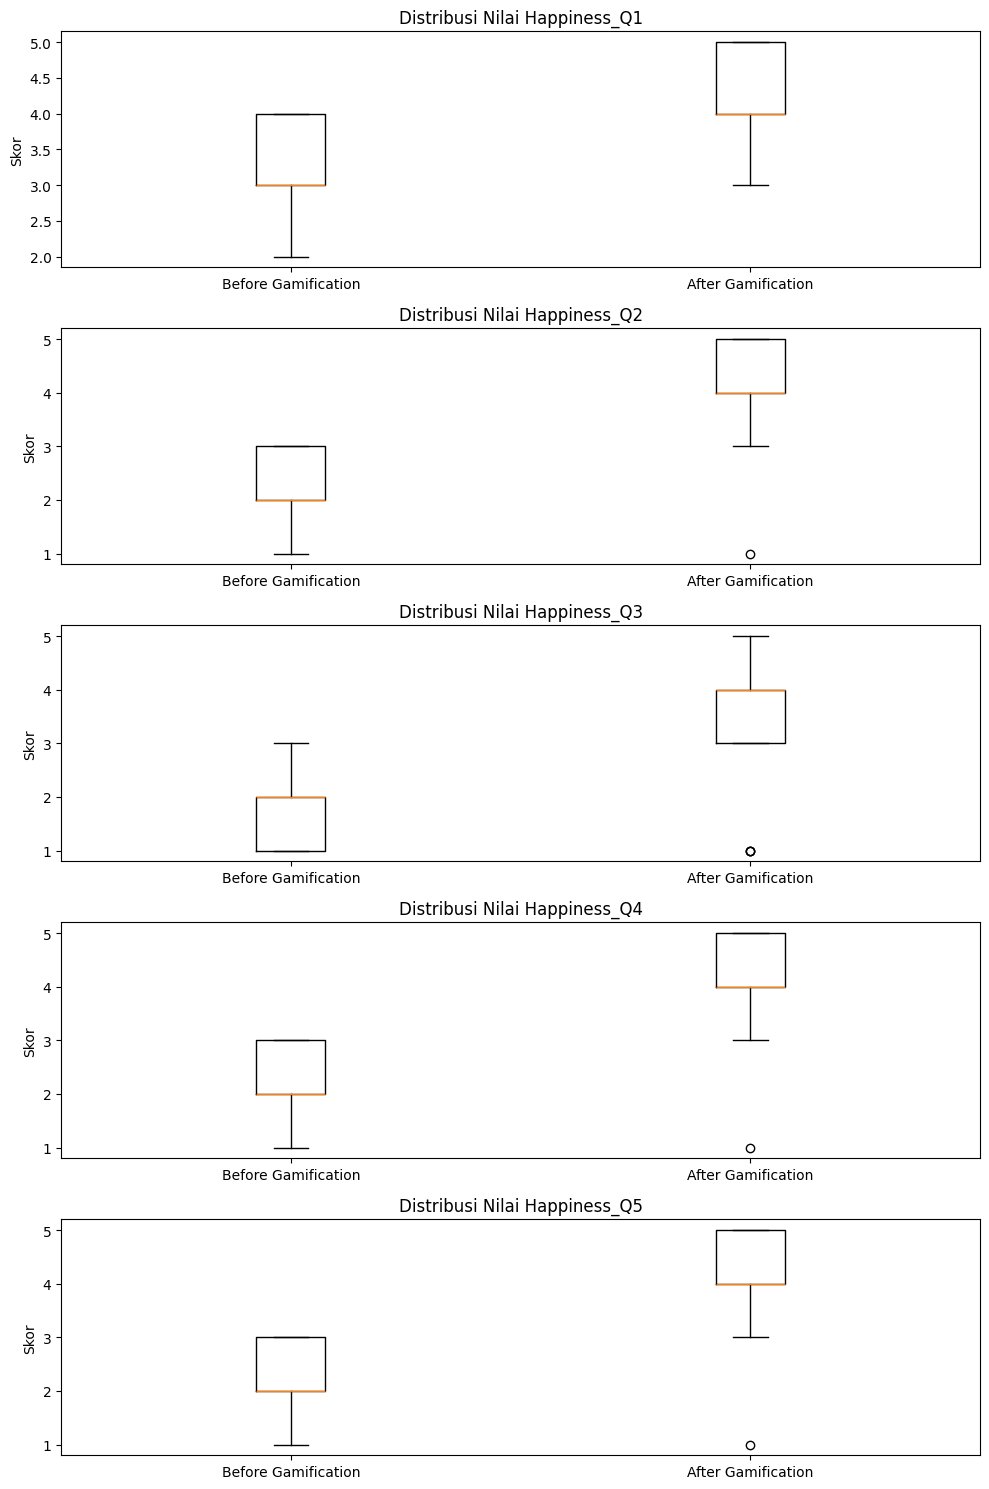

In [21]:
# Visualisasi data: Boxplot untuk membandingkan distribusi nilai sebelum dan setelah gamifikasi
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

for i, aspect in enumerate(heart_columns[:5]):  # Menampilkan hanya 5 aspek pertama untuk visualisasi
    data_before = df_before[aspect]
    data_after = df_after[aspect]

    axs[i].boxplot([data_before, data_after], labels=["Before Gamification", "After Gamification"])
    axs[i].set_title(f'Distribusi Nilai {aspect}')
    axs[i].set_ylabel('Skor')

plt.tight_layout()
plt.show()